In [ ]:
#download:
!pip install yfinance

In [ ]:
#import
import yfinance as yf
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

QUESTION 1:USE YFINANCE TO EXRTACT STOCK DATA

In [ ]:
tesla=yf.Ticker("TSLA")

In [ ]:
tesla_history=tesla.history(period="max")

In [ ]:
tesla_history_reset=tesla_history.reset_index(inplace=True)
tesla_history.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


QUESTION 2:USE WEBSCRAPING TO EXTRACT TESLA REVENUE DATA 

In [ ]:
url="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
url_data=requests.get(url).text
#parse data
soup=BeautifulSoup(url_data,"html5lib")

In [ ]:
general=soup.find_all("div",{"class":"col-xs-6"})
general=general[1]#with this expression we are clearing the general
# expression from tesla's annual income

In [ ]:
date=[]
revenue1=[]
revenue2=[]

In [ ]:
for item in general :
  tbody=general.find("tbody")
  tr=tbody.find_all("tr")
  for i in tr:
    date.append(i.find_all("td")[0].text)
    revenue1.append(i.find_all("td")[1].text)

In [ ]:
#delete $ from money:
try:
  for item in revenue1:
    revenue2.append(item.replace("$",""))
except:
  pass

In [ ]:
#create dictonary
dic={"Date":date,"Revenue":revenue2}
#create dataframe
df_tesla=pd.DataFrame(dic)

In [ ]:
df_tesla

,Date,Revenue
0,2022-09-30,"21,454"
1,2022-06-30,"16,934"
2,2022-03-31,"18,756"
3,2021-12-31,"17,719"
4,2021-09-30,"13,757"
...,...,...
157,2010-06-30,28
158,2010-03-31,21
159,2009-12-31,
160,2009-09-30,46


QUESTION 3:USE YFINANCE TO EXTRACT STOCK DATA

In [ ]:
gme=yf.Ticker("GME")
gme_data=gme.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


QUESTION 4:USE WEBSCRAPING TO EXTRACT GME REVENUE DATA

In [ ]:
url="https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
url_data=requests.get(url).text
soup=BeautifulSoup(url_data,"html5lib")

In [ ]:
general=soup.find_all("div",{"class":"col-xs-6"})
general2=general[1]

In [ ]:
date2=[]
revenue3=[]
revenue4=[]

In [ ]:
for item in general2 :
  tbody=general2.find("tbody")
  tr=tbody.find_all("tr")
  for i in tr:
    date2.append(i.find_all("td")[0].text)
    revenue3.append(i.find_all("td")[1].text)

In [ ]:
try:
  for item in revenue3:
    revenue4.append(item.replace("$",""))
except:
  pass

In [ ]:
#create dictonary
dic2={"Date":date2,"Revenue":revenue4}
#create dataframe
df_gme=pd.DataFrame(dic2)
df_gme

,Date,Revenue
0,2022-10-31,"1,186"
1,2022-07-31,"1,136"
2,2022-04-30,"1,378"
3,2022-01-31,"2,254"
4,2021-10-31,"1,297"
...,...,...
163,2010-01-31,"3,524"
164,2009-10-31,"1,835"
165,2009-07-31,"1,739"
166,2009-04-30,"1,981"


QUESTION5:PLOT TESLA STOCK GRAPH

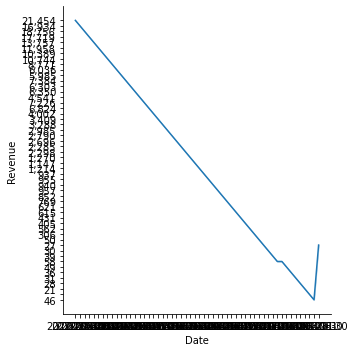

In [ ]:
graph_tesla=sns.relplot(data=df_tesla,x="Date",y="Revenue",kind="line")

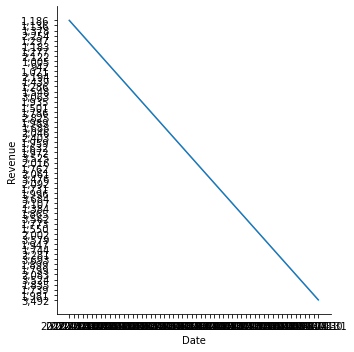

In [ ]:
graph_gme=sns.relplot(data=df_gme,x="Date",y="Revenue",kind="line")